<a href="https://colab.research.google.com/github/SanikaPanchabhai/DL_Practicals/blob/main/DL_pract1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Data loading


In [ ]:
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target


Step 2: Data Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encode labels
y_encoded = to_categorical(y)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42
)


Step 3: Design MLP Model (3 Dense Layers)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(10, input_shape=(4,), activation='relu'))  # Layer 1
model.add(Dense(8, activation='relu'))                    # Layer 2
model.add(Dense(3, activation='softmax'))                 # Output layer


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Step 4: Compile the Model

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


Step 5: Train the Model

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=5,
    validation_data=(X_test, y_test),
    verbose=1
)


Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.2398 - loss: 1.1051 - val_accuracy: 0.4667 - val_loss: 0.9653
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4250 - loss: 1.0261 - val_accuracy: 0.4667 - val_loss: 0.9089
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4143 - loss: 1.0131 - val_accuracy: 0.6000 - val_loss: 0.8640
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4683 - loss: 0.9387 - val_accuracy: 0.6333 - val_loss: 0.8233
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5608 - loss: 0.8844 - val_accuracy: 0.6000 - val_loss: 0.7840
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5249 - loss: 0.8981 - val_accuracy: 0.6000 - val_loss: 0.7464
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6124 - loss: 0.7991 - val_accuracy: 0.6333 - val_loss: 0.7090
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6581 - loss: 0.7958 - val_accuracy: 0.8000 

Step 6: Evaluate the Model

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Loss: 0.0504
Test Accuracy: 96.67%


Step 7: Make Predictions

In [ ]:
import numpy as np

y_prob = model.predict(X_test)
y_pred = np.argmax(y_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

for i in range(10):
    print(f"True: {y_true[i]} - Predicted: {y_pred[i]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
True: 1 - Predicted: 1
True: 0 - Predicted: 0
True: 2 - Predicted: 2
True: 1 - Predicted: 1
True: 1 - Predicted: 1
True: 0 - Predicted: 0
True: 1 - Predicted: 1
True: 2 - Predicted: 2
True: 1 - Predicted: 2
True: 1 - Predicted: 1


Step 8: Plot Accuracy and Loss Graphs

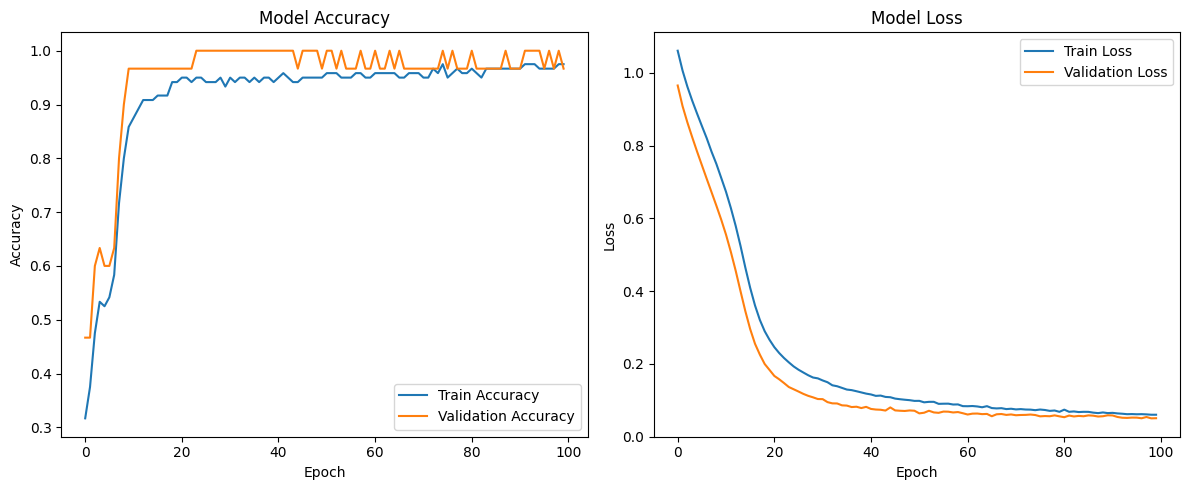

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()